In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df-clean-03.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df

,Date,Maker,Sales,Identifier,Category
0,2010-02-15,Toshino,2143.0,RVFWTWSMNU,Air Conditioners
1,2010-02-15,Akaza,3515.0,VUQUQMHODG,Washers & Dryers
2,2010-02-15,Akaza,687.0,XVIOZZOUTN,Refrigerators
3,2010-02-15,Shimada,435.0,RBRMDIXXGL,Washers & Dryers
4,2010-02-15,Funami,726.0,BIBIOOIHA,Refrigerators
...,...,...,...,...,...
93166,2021-04-29,Shimada,1258.0,WVJTPVZKAQ,Ovens & Cooktops
93167,2021-04-29,Akaza,5422.0,VUQUQMHODG,Washers & Dryers
93168,2021-04-29,Hayashida,539.0,GCPKFKSEWG,Vacuum Cleaners
93169,2021-04-29,Furutani,10547.0,FVDHIZGQRC,Water Pumps


In [6]:
pvt_maker = pd.pivot_table(df, values='Sales', index='Date', columns=['Maker'], aggfunc=np.sum)

In [7]:
pvt_maker

Maker,Akaza,Funami,Furutani,Hayashida,Hisami,Ikeda,Katayama,Kikuma,Matsumoto,Nanase,Okamoto,Omuro,Shimada,Sugiura,Toshino,Yoshikawa
Date,,,,,,,,,,,,,,,,
2010-02-15,4544.00,14929.0,10014.0,134.00,749.0,562.0,1517.0,NaN,425.0,4011.0,322.0,38504.57,2388.00,3908.00,8919.00,1754.00
2010-02-16,4572.00,15464.0,10122.0,136.00,758.0,586.0,1549.0,NaN,427.0,4197.0,316.0,35678.00,2413.00,4009.83,9138.00,1792.00
2010-02-17,4665.00,15860.0,10146.0,139.00,753.0,569.0,1549.0,NaN,419.0,4246.0,307.0,36282.00,2413.00,4045.00,9442.33,1761.00
2010-02-18,4615.00,15436.0,10072.0,139.00,756.0,567.0,1517.0,NaN,409.0,4167.0,316.0,35437.00,2364.00,3997.00,9233.00,1797.00
2010-02-19,4668.21,15405.0,9946.0,133.00,758.0,570.0,1465.0,NaN,423.0,4145.0,317.0,34852.00,2354.00,3946.00,9262.00,1784.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,8914.00,19035.0,16508.0,512.00,1147.0,2808.0,3877.0,798.0,8207.0,5315.0,1507.0,45082.00,5057.00,2640.00,15261.00,5996.00
2021-04-26,8966.00,18790.0,16630.0,519.94,1158.0,2671.0,3841.0,797.0,7982.0,5465.0,1480.0,44390.00,4905.00,2626.00,15018.00,6040.41
2021-04-27,8884.00,18658.0,16304.0,519.94,1185.0,2507.0,3825.0,802.0,7470.0,5488.0,1474.0,44922.00,4914.59,2632.00,14952.00,6097.00


<AxesSubplot:xlabel='Date'>

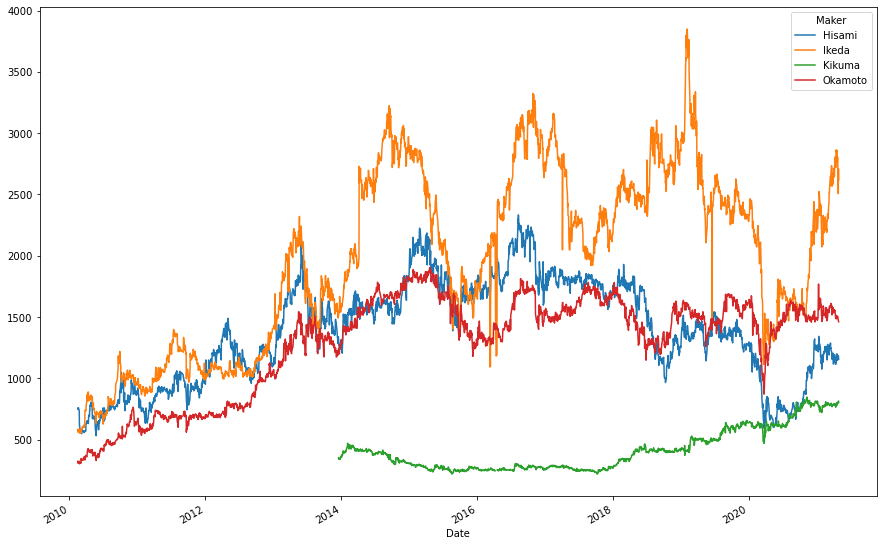

In [8]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino', 'Akaza', 'Shimada', 'Yoshikawa', 'Sugiura', 'Matsumoto', 'Katayama', 'Nanase'],
               axis=1).plot(figsize=(15, 10))

In [9]:
pvt_cat = pd.pivot_table(df, values='Sales', index='Date', columns=['Category'], aggfunc=np.sum)

<AxesSubplot:xlabel='Date'>

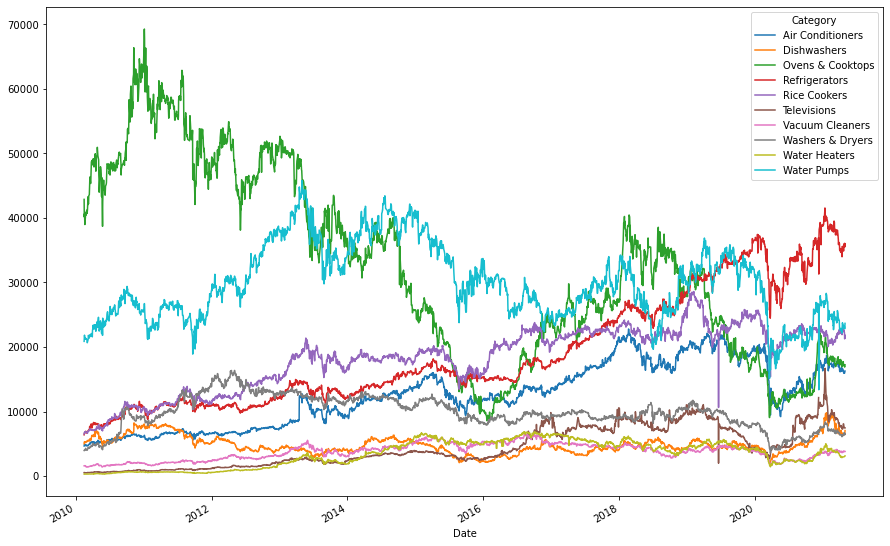

In [10]:
pvt_cat.plot(figsize=(15, 10))